# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Shlomo 6825
# student 2: Eden 9994
# student 3: Shira 3972

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore, stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
import numpy as np



pd.set_option('display.max_colwidth', None)

In [3]:
def load_file(data_file):
    df = pd.read_csv(data_file)
    return df

In [4]:
df_train = load_file(r"wine_train.csv")
df_test = load_file(r"wine_test.csv")
#need to change the path to be rlevant to 
print("5 first row of train DF")
df_train.head()


5 first row of train DF


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [5]:
print("5 first row of test DF")
df_test.head()

5 first row of test DF


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [6]:
#We will perform an info function that checks the amount of data and whether there are any missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [7]:
#We have 142 rows and we don't have any null value 

In [8]:
#split to X_train and y_train
X_train = df_train.drop("target",axis=1)
y_train =df_train["target"]

In [9]:
#Checking whether there is duplicate rows
print(X_train.duplicated().sum())

0


In [10]:
#we don't have no duplicated rows

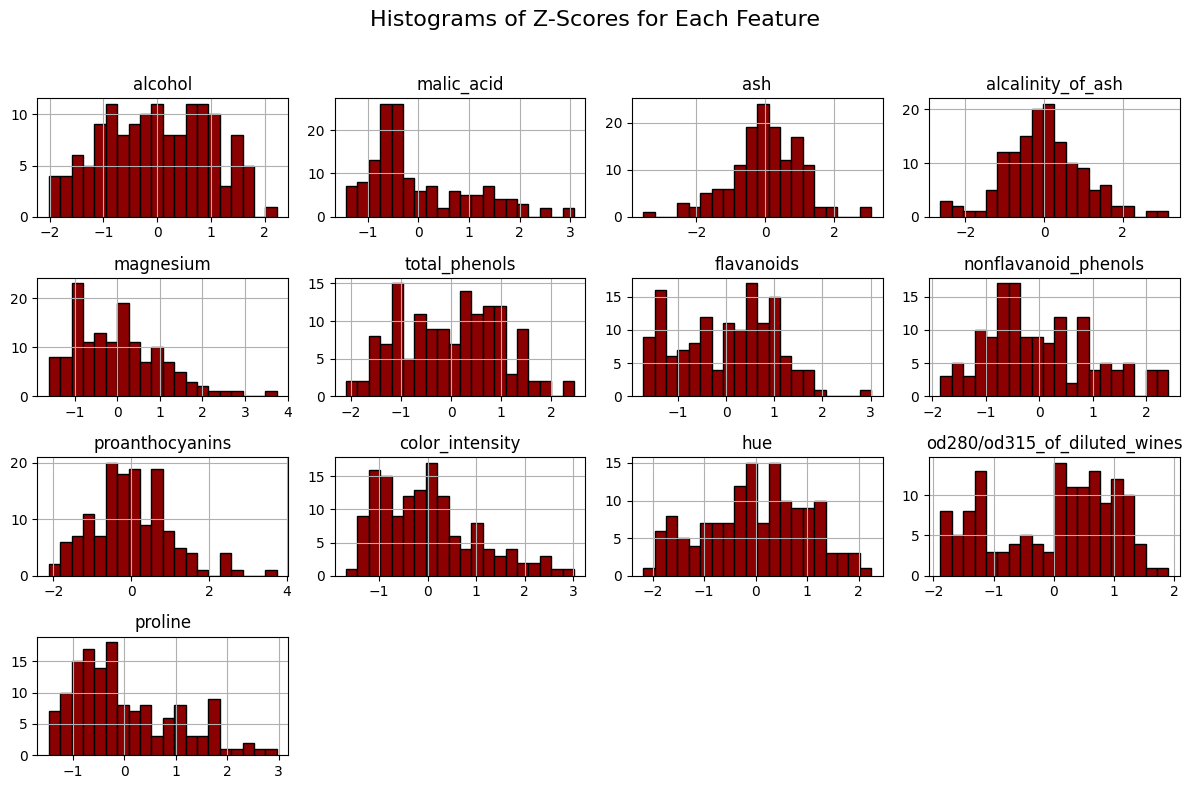

In [11]:
#Calculation of distribution according to z_score
z_scores = X_train.apply(zscore)
z_scores.hist(bins=20, figsize=(12, 8), color='darkred', edgecolor='black')
plt.suptitle('Histograms of Z-Scores for Each Feature', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])


In [12]:
#Presentation of a table according to Pearson's correlation coefficient between different features
correlation_matrix = df_train.corr()
(correlation_matrix)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


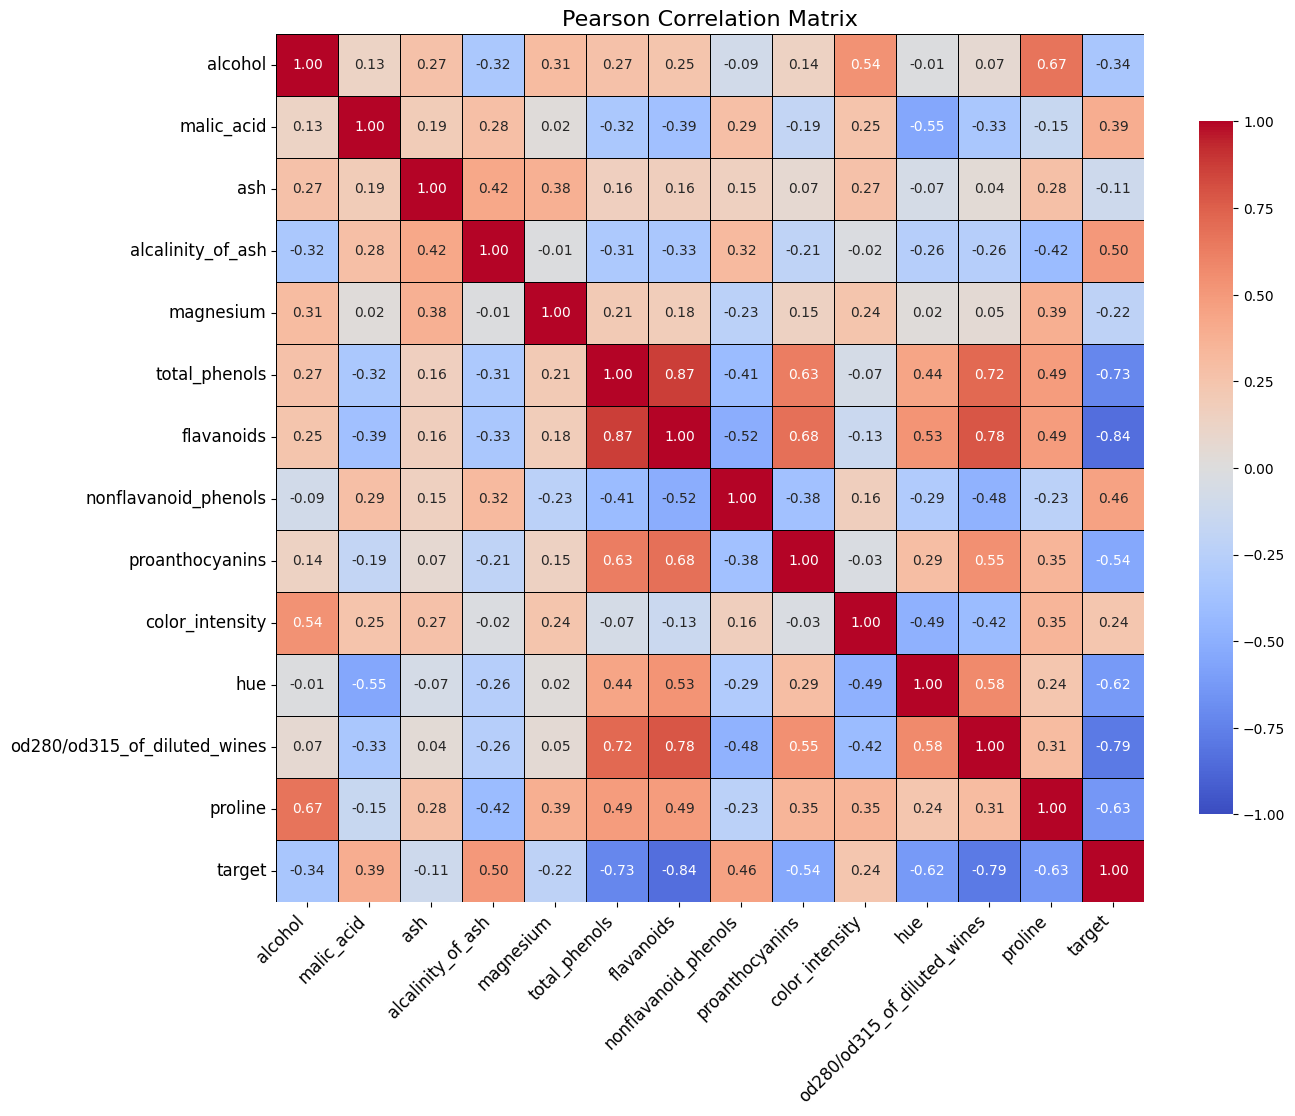

In [13]:
#Presentation of a heatmap according to above table
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='black',
    square=True,
    cbar_kws={'shrink': .75}
)
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [14]:
#we want to extract the features with coefficient more then 0.75.(abs(0.75))
for i in range(correlation_matrix.shape[0]):
    for j in range(i):
        if i==j:
            continue
        if correlation_matrix.iloc[i,j]>0.75 :
            print ("in place (" + str(i) + "," + str(j)  + ") we have high value:"+ str(correlation_matrix.iloc[i,j]))
        if correlation_matrix.iloc[i,j]<-0.75 :
            print ("in place (" + str(i) + "," + str(j)  + ") we have low value:"+ str(correlation_matrix.iloc[i,j]))

in place (6,5) we have high value:0.8696340917341853
in place (11,6) we have high value:0.7817809974047366
in place (13,6) we have low value:-0.8380600510057158
in place (13,11) we have low value:-0.7880865233846818


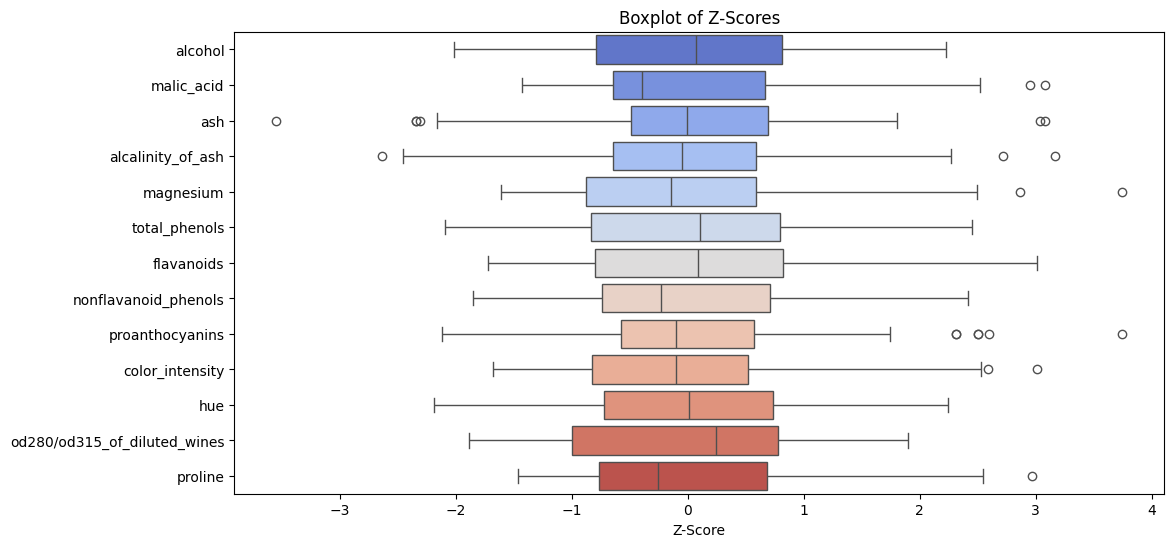

In [15]:
#finding the outlier data by z_score
z_scores = X_train.apply(zscore)

plt.figure(figsize=(12, 6))
sns.boxplot(data=z_scores, orient='h', palette='coolwarm')
plt.title('Boxplot of Z-Scores')
plt.xlabel('Z-Score')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

# *This is results without feature engineering*

In [16]:
#split to X_train and y_train
X_train = df_train.drop("target",axis=1)
y_train =df_train["target"]
data = list() #this dictionary will contain all the best score of the cross-validation testing

In [17]:
#cross-validitaion tranning of knn algoritem in order to find the best hyperparameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],   
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan','minkowski','chebyshev'] 
}
f1 = make_scorer(f1_score, average='weighted')
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=f1) 
knn_grid_search.fit(X_train, y_train)
# Best hyperparameters and F1 score for KNN
print("Best KNN Hyperparameters:", knn_grid_search.best_params_)
print(f"Best KNN F1 Score: {knn_grid_search.best_score_:.4f}")
knn_without_feature_engineering_results = pd.DataFrame(knn_grid_search.cv_results_)

dict_ = {'model': "knn without feature engineering", "best score": float(knn_grid_search.best_score_),'hyperparameter':knn_grid_search.best_params_ }
data.append(dict_)

Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN F1 Score: 0.7584


In [18]:
#cross-validitaion tranning of decision tree algoritem in order to find the best hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, None],    
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}
f1 = make_scorer(f1_score, average='weighted')
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring=f1)
decision_tree_grid_search.fit(X_train, y_train)
print(f"Best decision tree Hyperparameters: {decision_tree_grid_search.best_params_}")
best_model = decision_tree_grid_search.best_estimator_
test_f1_score = f1_score(y_train, best_model.predict(X_train), average='weighted')
print(f"Best decision tree F1 Score: {test_f1_score:.4f}")
print(test_f1_score)
decision_tree_without_feature_engineering_results = pd.DataFrame(decision_tree_grid_search.cv_results_)
dict_ = {'model': "decision tree without feature engineering", "best score": float(test_f1_score),'hyperparameter':decision_tree_grid_search.best_params_ }
data.append(dict_)

Best decision tree Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best decision tree F1 Score: 1.0000
1.0


In [19]:
#cross-validitaion tranning of NB algoritem in order to find the best hyperparameters
f1_scorer = make_scorer(f1_score, average='weighted')
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
model = GaussianNB()
NB_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=5)
NB_grid_search.fit(X_train, y_train)
print(f"Best NB Hyperparameters: {NB_grid_search.best_params_}")
print(f"Best NB F1 Score: {NB_grid_search.best_score_:.4f}")
NB_without_feature_engineering_results = pd.DataFrame(NB_grid_search.cv_results_)
dict_ = {'model': "NB without feature engineering", "best score": float(NB_grid_search.best_score_),'hyperparameter':NB_grid_search.best_params_ }
data.append(dict_)

Best NB Hyperparameters: {'var_smoothing': 1e-09}
Best NB F1 Score: 0.9654


# *feature engineering*: 
removing outliers

In [20]:
def compute_z_scores(df):
    z_scores = (df - df.mean()) / df.std()
    return z_scores

z_scores = compute_z_scores(df_train.select_dtypes(include=['number']))

# Set a threshold for Z-Score
threshold = 2.5

# Create a boolean mask for non-outlier rows
mask = (abs(z_scores) < threshold).all(axis=1)

# Filter the DataFrame to remove outliers
filtered_df = df_train[mask].copy()

In [21]:
X_filtered = filtered_df.drop("target",axis=1)
y_train_filtered = filtered_df['target']

In [22]:
#cross-validitaion tranning of knn algoritem in order to find the best hyperparameters without outlier
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan','minkowski','chebyshev']  
}
f1 = make_scorer(f1_score, average='weighted')
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=f1)
knn_grid_search.fit(X_filtered, y_train_filtered)
# Best hyperparameters and F1 score for KNN
print("Best KNN Hyperparameters:", knn_grid_search.best_params_)
print(f"Best KNN F1 Score: {knn_grid_search.best_score_:.4f}")
knn_removing_outliers_results = pd.DataFrame(knn_grid_search.cv_results_)

dict_ = {'model': "knn remove outlier bs", "best score": float(knn_grid_search.best_score_),'hyperparameter':knn_grid_search.best_params_ }
data.append(dict_)


Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best KNN F1 Score: 0.7866


In [23]:
#cross-validitaion tranning of decision tree algoritem in order to find the best hyperparameters without outlier
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, None],    
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]     
}
f1 = make_scorer(f1_score, average='weighted')
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring=f1)
decision_tree_grid_search.fit(X_filtered, y_train_filtered)
print(f"Best decision tree Hyperparameters: {decision_tree_grid_search.best_params_}")
best_model = decision_tree_grid_search.best_estimator_
test_f1_score = f1_score(y_train_filtered, best_model.predict(X_filtered), average='weighted')
print(f"Best decision tree F1 Score: {test_f1_score:.4f}")
decision_tree_outliers_results = pd.DataFrame(decision_tree_grid_search.cv_results_)

dict_ = {'model': "decision tree remove outlier bs", "best score": float(test_f1_score),'hyperparameter':decision_tree_grid_search.best_params_ }
data.append(dict_)

Best decision tree Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best decision tree F1 Score: 0.9844


In [24]:
#cross-validitaion tranning of NB algoritem in order to find the best hyperparameters without outlier
f1_scorer = make_scorer(f1_score, average='weighted')
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
model = GaussianNB()
NB_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=5)
NB_grid_search.fit(X_filtered, y_train_filtered)
print(f"Best NB Hyperparameters: {NB_grid_search.best_params_}")
print(f"Best NB F1 Score: {NB_grid_search.best_score_:.4f}")
NB_outliers_results = pd.DataFrame(NB_grid_search.cv_results_)

dict_ = {'model': "NB remove outlier bs", "best score": float(NB_grid_search.best_score_),'hyperparameter':NB_grid_search.best_params_ }
data.append(dict_)

Best NB Hyperparameters: {'var_smoothing': 1e-09}
Best NB F1 Score: 0.9618


# *This is scaled results:*

In [25]:
#using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [26]:
#cross-validitaion tranning of knn algoritem in order to find the best hyperparameters with scaling
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan','minkowski','chebyshev'] 
}
f1 = make_scorer(f1_score, average='weighted')
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=f1)
knn_grid_search.fit(X_scaled, y_train)
# Best hyperparameters and F1 score for KNN
print("Best KNN Hyperparameters:", knn_grid_search.best_params_)
print(f"Best KNN F1 Score: {knn_grid_search.best_score_:.4f}")
knn_scaled_results = pd.DataFrame(knn_grid_search.cv_results_)

dict_ = {'model': "knn scaled bs", "best score": float(knn_grid_search.best_score_),'hyperparameter':knn_grid_search.best_params_ }
data.append(dict_)

Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN F1 Score: 0.9789


#Decision trees do not require scaling because they split data based on the order of feature values rather than their magnitudes, making the scale of the features irrelevant to their performance.

In [27]:
#cross-validitaion tranning of NB algoritem in order to find the best hyperparameters with scaling
f1_scorer = make_scorer(f1_score, average='weighted')
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
model = GaussianNB()
NB_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=5)
NB_grid_search.fit(X_scaled, y_train)
print(f"Best NB Hyperparameters: {NB_grid_search.best_params_}")
print(f"Best NB F1 Score: {NB_grid_search.best_score_:.4f}")
NB_scaled_results = pd.DataFrame(NB_grid_search.cv_results_)

dict_ = {'model': "NB scaled bs", "best score": float(NB_grid_search.best_score_),'hyperparameter':NB_grid_search.best_params_ }
data.append(dict_)

Best NB Hyperparameters: {'var_smoothing': 1e-09}
Best NB F1 Score: 0.9654


# *Results for removing a dependent feature:*

In [28]:
#In checking the correlation coefficient we found that there is a high correlation between the fifth and sixth features, so to optimize the data we will remove the fifth feature.
df_removed_feature = df_train.drop(columns=['total_phenols']).copy()

In [29]:
#cross-validitaion tranning of knn algoritem in order to find the best hyperparameters after removing feature with high correlation
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan','minkowski','chebyshev']  
}
f1 = make_scorer(f1_score, average='weighted')
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=f1)
knn_grid_search.fit(df_removed_feature, y_train)
# Best hyperparameters and F1 score for KNN
print("Best KNN Hyperparameters:", knn_grid_search.best_params_)
print(f"Best KNN F1 Score: {knn_grid_search.best_score_:.4f}")
knn_removing_feature_results = pd.DataFrame(knn_grid_search.cv_results_)

dict_ = {'model': "knn removing dependent feature", "best score": float(knn_grid_search.best_score_),'hyperparameter':knn_grid_search.best_params_ }
data.append(dict_)

Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN F1 Score: 0.7745


In [30]:
#cross-validitaion tranning of decision_tree algoritem in order to find the best hyperparameters after removing feature with high correlation
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, None],     
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]    
}
f1 = make_scorer(f1_score, average='weighted')
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring=f1)
decision_tree_grid_search.fit(df_removed_feature, y_train)
print(f"Best decision tree Hyperparameters: {decision_tree_grid_search.best_params_}")
best_model = decision_tree_grid_search.best_estimator_
test_f1_score = f1_score(y_train, best_model.predict(df_removed_feature), average='weighted')
print(f"Best decision tree F1 Score: {test_f1_score:.4f}")
decision_tree_removing_feature_results = pd.DataFrame(decision_tree_grid_search.cv_results_)
dict_ = {'model': "decision tree removing dependent feature", "best score": float(test_f1_score),'hyperparameter':decision_tree_grid_search.best_params_ }
data.append(dict_)

Best decision tree Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best decision tree F1 Score: 1.0000


In [31]:
#cross-validitaion tranning of NB algoritem in order to find the best hyperparameters after removing feature with high correlation
f1_scorer = make_scorer(f1_score, average='weighted')
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
model = GaussianNB()
NB_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=5)
NB_grid_search.fit(df_removed_feature, y_train)
print(f"Best NB Hyperparameters: {NB_grid_search.best_params_}")
print(f"Best NB F1 Score: {NB_grid_search.best_score_:.4f}")
NB_removing_feature_results = pd.DataFrame(NB_grid_search.cv_results_)
dict_ = {'model': "NB removing dependent feature", "best score": float(NB_grid_search.best_score_),'hyperparameter':NB_grid_search.best_params_ }
data.append(dict_)

Best NB Hyperparameters: {'var_smoothing': 1e-09}
Best NB F1 Score: 1.0000


# *This is scaling, remove outliers and dependent feature results:*

In [32]:
df_removed_feature = filtered_df.drop(columns=['total_phenols']).copy()
X_filtered = df_removed_feature.drop("target",axis=1)
y_train = df_removed_feature['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [33]:
#cross-validitaion tranning of knn algoritem in order to find the best hyperparameters after scaling, remove outliers and dependent feature
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan','minkowski','chebyshev']  
}
f1 = make_scorer(f1_score, average='weighted')
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=f1)
knn_grid_search.fit(X_scaled, y_train)
# Best hyperparameters and F1 score for KNN
print("Best KNN Hyperparameters:", knn_grid_search.best_params_)
print(f"Best KNN F1 Score: {knn_grid_search.best_score_:.4f}")
knn_results = pd.DataFrame(knn_grid_search.cv_results_)
dict_ = {'model': "knn all permutations", "best score": float(knn_grid_search.best_score_),'hyperparameter':knn_grid_search.best_params_ }
data.append(dict_)

Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN F1 Score: 0.9924


In [34]:
#cross-validitaion tranning of decision_tree algoritem in order to find the best hyperparameters after remove outliers and dependent feature
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, None],    
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}
f1 = make_scorer(f1_score, average='weighted')
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring=f1)
decision_tree_grid_search.fit(X_filtered, y_train)
print(f"Best decision tree Hyperparameters: {decision_tree_grid_search.best_params_}")
best_model = decision_tree_grid_search.best_estimator_
test_f1_score = f1_score(y_train, best_model.predict(X_filtered), average='weighted')
print(f"Best decision tree F1 Score: {test_f1_score:.4f}")
decision_tree_results = pd.DataFrame(decision_tree_grid_search.cv_results_)

dict_ = {'model': "decision tree 2 permutations", "best score": float(test_f1_score),'hyperparameter':decision_tree_grid_search.best_params_ }
data.append(dict_)

Best decision tree Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best decision tree F1 Score: 0.9922


In [35]:
#cross-validitaion tranning of NB algoritem in order to find the best hyperparameters after scaling, remove outliers and dependent feature
f1_scorer = make_scorer(f1_score, average='weighted')
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
model = GaussianNB()
NB_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=5)
NB_grid_search.fit(X_scaled, y_train)
print(f"Best NB Hyperparameters: {NB_grid_search.best_params_}")
print(f"Best NB F1 Score: {NB_grid_search.best_score_:.4f}")
NB_results = pd.DataFrame(NB_grid_search.cv_results_)
dict_ = {'model': "NB all permutations", "best score": float(NB_grid_search.best_score_),'hyperparameter':NB_grid_search.best_params_ }
data.append(dict_)

Best NB Hyperparameters: {'var_smoothing': 1e-09}
Best NB F1 Score: 0.9697


# *Results comparison table*

In [36]:
df_results = pd.DataFrame(data)
df_results = df_results.sort_values(by='best score', ascending=False)
df_results
#The index number is according to the serial number of the model we ran.
#It is affected by the sorting we did

,model,best score,hyperparameter
1,decision tree without feature engineering,1.000000,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}"
9,decision tree removing dependent feature,1.000000,"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}"
10,NB removing dependent feature,1.000000,{'var_smoothing': 1e-09}
11,knn all permutations,0.992420,"{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}"
12,decision tree 2 permutations,0.992161,"{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}"
4,decision tree remove outlier bs,0.984414,"{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}"
6,knn scaled bs,0.978859,"{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}"
13,NB all permutations,0.969667,{'var_smoothing': 1e-09}
7,NB scaled bs,0.965435,{'var_smoothing': 1e-09}
2,NB without feature engineering,0.965435,{'var_smoothing': 1e-09}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

#decision tree without feature engineering

In the next section we will show that the first model with score equal 1 is not good because of overfitting.
we will show that the model with the score closest to 1 (but not equal to 1) is the best model.

In [37]:
#traning the decision tree model without feature engineering
#hyperparameter: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

X_train = df_train.drop("target",axis=1)
y_train = df_train['target']
params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}
dt_model = DecisionTreeClassifier(**params)
dt_model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Traning the model with closest score to one: 

In [38]:
#traning the knn model with scaling, removing outliers and feature depended
#hyperparameter: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

df_removed_feature = filtered_df.drop(columns=['total_phenols']).copy()
X_filtered = df_removed_feature.drop("target",axis=1)
y_train = df_removed_feature['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

params = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
knn_model = KNeighborsClassifier(**params)
knn_model.fit(X_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

## Part 5 - Apply on test and show model performance estimation

prediction of decision tree model without feature engineering
hyperparameter: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
X_test = df_test.drop("target",axis=1)
y_test = df_test['target']


y_pred = dt_model.predict(X_test)
#printing the report of model as you can see the model doesn't have good score- this is caused by the overfitting of the model traning.
print("Classification Report:")
report = classification_report(y_test,y_pred, output_dict=True)
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90        14
           2       1.00      0.91      0.95        11

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



In [40]:
error_rate = 1 - report['accuracy']
print(f'error rate: {error_rate}')

error rate: 0.08333333333333337


# *The model that we choosed and his evaluation* 

In [41]:
df_removed_feature = df_test.drop(columns=['total_phenols']).copy()
X_filtered = df_removed_feature.drop("target",axis=1)
y_test = df_test['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

y_pred = knn_model.predict(X_scaled)

print('The first 5 predicted class results: ', y_pred[:5])
print('The first 5 actual class results:    ', y_test.values[:5])

print("Classification Report:")
report = classification_report(y_test,y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
error_rate = 1 - report['accuracy']
print(f'error rate: {error_rate}')

The first 5 predicted class results:  [2 0 2 1 2]
The first 5 actual class results:     [2 0 2 1 2]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

error rate: 0.0


In [42]:
cm = confusion_matrix(df_test["target"].values, y_pred, labels=[0, 1, 2])
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1', 'Actual 2'], columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])

print("Confusion Matrix:")
confusion_df


Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,11,0,0
Actual 1,0,14,0
Actual 2,0,0,11
